## We can perform hyper parameter tuning with the help of keras tuner

### Normal model which is generally created without hyper parameter tuning

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [4]:
df = pd.read_csv('../../dataset/diabetes.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.duplicated().sum()

np.int64(0)

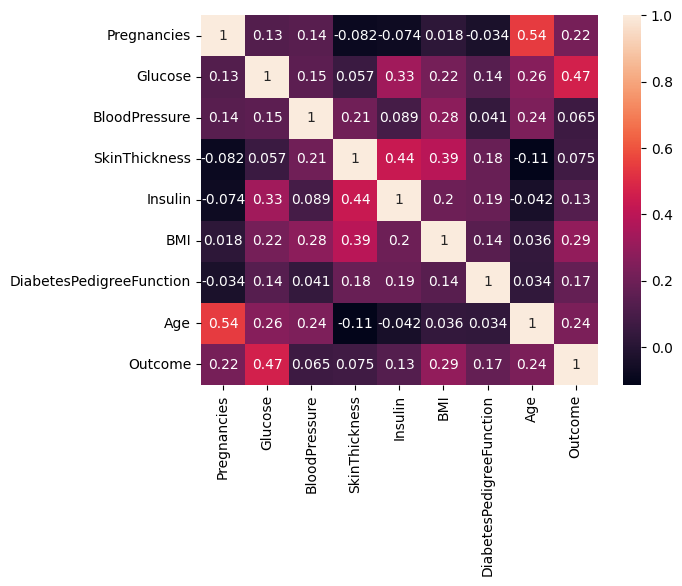

In [6]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [8]:
x = df.drop(columns='Outcome')
y = df['Outcome']

In [9]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [10]:
x.shape

(768, 8)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

f:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.4104 - loss: 0.7502 - val_accuracy: 0.5390 - val_loss: 0.7137
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5993 - loss: 0.6794 - val_accuracy: 0.6623 - val_loss: 0.6645
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6808 - loss: 0.6289 - val_accuracy: 0.6883 - val_loss: 0.6310
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7085 - loss: 0.5913 - val_accuracy: 0.6883 - val_loss: 0.6056
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7296 - loss: 0.5620 - val_accuracy: 0.6818 - val_loss: 0.5862
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7492 - loss: 0.5390 - val_accuracy: 0.6948 - val_loss: 0.5736
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7459 - loss: 0.5226 - val_accuracy: 0.7013 - val_loss: 0.5607
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7508 - loss: 0.5089 - val_accuracy: 0.7143 - 

# Model created using hyper parameter tuning with the help of keras tuner

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout

import kerastuner as kt

# 1. Finding the best optimizer using keras tuner

In [15]:
def build_models(hp):
    model = Sequential()
    
    model.add(Dense(32, activation='relu', input_dim=8))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizers = hp.Choice('optimizer', values = ['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer=optimizers, loss='binary_crossentropy', metrics=['accuracy'])
    # model.compile(optimizer=hp.Choice('optimizer', values = ['adam','sgd','rmsprop','adadelta'])) ## another method
    
    return model
    

In [16]:
tuner = kt.RandomSearch(build_models, 
                        objective='val_accuracy',
                        max_trials=5)

In [17]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 4 Complete [00h 00m 03s]
val_accuracy: 0.6298701167106628

Best val_accuracy So Far: 0.7467532753944397
Total elapsed time: 00h 00m 14s


In [25]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [26]:
model = tuner.get_best_models(num_models=1)[0]

f:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
f:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.fit(x_train, y_train, batch_size=32, epochs=100, initial_epoch=6, validation_data=(x_test, y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7508 - loss: 0.5263 - val_accuracy: 0.7468 - val_loss: 0.5378
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7573 - loss: 0.5098 - val_accuracy: 0.7727 - val_loss: 0.5294
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7622 - loss: 0.5000 - val_accuracy: 0.7792 - val_loss: 0.5240
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7606 - loss: 0.4923 - val_accuracy: 0.7727 - val_loss: 0.5209
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7590 - loss: 0.4851 - val_accuracy: 0.7662 - val_loss: 0.5175
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7671 - loss: 0.4787 - val_accuracy: 0.7662 - val_loss: 0.5146
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7704 - loss: 0.4728 - val_accuracy: 0.7662 - val_loss: 0.5135
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7720 - loss: 0.4684 - val_accuracy: 0.77

# 2. Finding the best number of nodes in a layer using keras tuner

In [29]:
import kerastuner as kt

In [34]:
def build_model(hp):
    model = Sequential()
    
    units = hp.Int('units', min_value=8, max_value=128, step=8)  ## here insted of units we can give another name also 
    # units = hp.Int('units',min_value=8, max_value=128)    ## we can use it with steps and without steps also  
    model.add(Dense(units=units, activation='relu', input_dim=8))
    # model.add(Dense(units=hp.Int('units',min_value=8, max_value=128, step=8), activation='relu', input_dim=8)) ## Another method
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [35]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=5,
                        directory='mydir',   ## it stores the all information in this directory
                        project_name='testing')  ## it stores all the information in above directory and in this folder

Reloading Tuner from mydir\testing\tuner0.json


In [36]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 10m 29s


In [37]:
tuner.get_best_hyperparameters()[0].values

{'units': 64}

In [39]:
model = tuner.get_best_models(num_models=1)[0]

f:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
f:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
model.fit(x_train, y_train, batch_size=32, epochs=10, initial_epoch=5, validation_data=(x_test, y_test))

Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7638 - loss: 0.4720 - val_accuracy: 0.7727 - val_loss: 0.4993
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7818 - loss: 0.4621 - val_accuracy: 0.7792 - val_loss: 0.4975
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7736 - loss: 0.4568 - val_accuracy: 0.7792 - val_loss: 0.4977
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7752 - loss: 0.4520 - val_accuracy: 0.7727 - val_loss: 0.4995
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7801 - loss: 0.4482 - val_accuracy: 0.7727 - val_loss: 0.4993


# 3. Selecting the best number of layers using keras tuner

In [42]:
import kerastuner as kt

In [ ]:
def build_model(hp):
    model = Sequential()
    
    model.add(Dense(72, activation='relu', input_dim=8))  ## we where adding the first layer for reducing the complexity
    
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        model.add(Dense(72, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    return model

In [48]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=3,
                        directory='mydir',
                        project_name='num_layers')

In [50]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 3 Complete [00h 00m 18s]
val_accuracy: 0.7597402334213257

Best val_accuracy So Far: 0.7597402334213257
Total elapsed time: 00h 00m 20s


In [51]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5}

In [52]:
model = tuner.get_best_models(num_models=1)[0]

f:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [53]:
model.fit(x_train, y_train, batch_size=32, epochs=10, initial_epoch=6, validation_data=(x_test, y_test))

Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7622 - loss: 0.4533 - val_accuracy: 0.7922 - val_loss: 0.4812
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7801 - loss: 0.4423 - val_accuracy: 0.7727 - val_loss: 0.5492
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8013 - loss: 0.4279 - val_accuracy: 0.7597 - val_loss: 0.5077
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8094 - loss: 0.4235 - val_accuracy: 0.7792 - val_loss: 0.5308


# 4. Finding the values of multiple hyper parameters using keras tuner

In [55]:
import kerastuner as kt

In [73]:
def build_model(hp):
    model = Sequential()
    
    counter = 0
        
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        if counter == 0:
            model.add(
                Dense(
                    hp.Int('units'+str(i), min_value=8, max_value=128, step=8),
                    activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid']),
                    input_dim=8
                    )
                )
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else:
            model.add(
                Dense(
                    hp.Int('units'+str(i), min_value=8, max_value=128, step=8),
                    activation=hp.Choice('activation'+str(i), values=['relu','tanh','sigmoid'])
                )
            )
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        counter+=1
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','adam','sgd','nadam','adadelta']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [74]:
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=3,
                        directory='mydir',
                        project_name='final')

Reloading Tuner from mydir\final\tuner0.json


In [75]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

In [76]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 112,
 'activation0': 'sigmoid',
 'dropout0': 0.7,
 'optimizer': 'sgd',
 'units1': 8,
 'activation1': 'relu',
 'dropout1': 0.1}

In [77]:
model = tuner.get_best_models(num_models=1)[0]

f:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
history = model.fit(x_train, y_train, epochs=100, initial_epoch=5, validation_data=(x_test, y_test))

Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4870 - loss: 0.7622 - val_accuracy: 0.6429 - val_loss: 0.6763
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5879 - loss: 0.7006 - val_accuracy: 0.6429 - val_loss: 0.6686
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5554 - loss: 0.7052 - val_accuracy: 0.6429 - val_loss: 0.6636
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5717 - loss: 0.6883 - val_accuracy: 0.6429 - val_loss: 0.6605
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5993 - loss: 0.6662 - val_accuracy: 0.6429 - val_loss: 0.6577
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6352 - loss: 0.6687 - val_accuracy: 0.6429 - val_loss: 0.6561
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5896 - loss: 0.6785 - val_accuracy: 0.6429 - val_loss: 0.6553
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6287 - loss: 0.6750 - val_accuracy: 0.642

[]

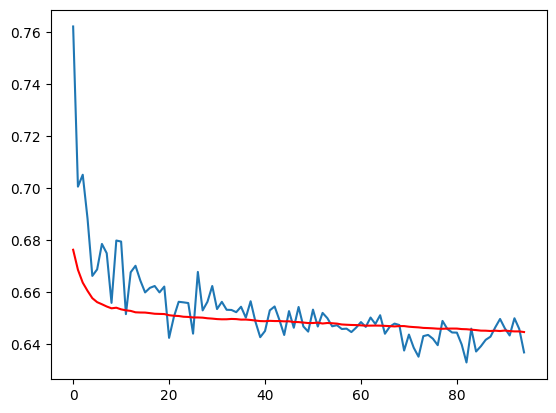

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], c='r')
plt.plot()

[]

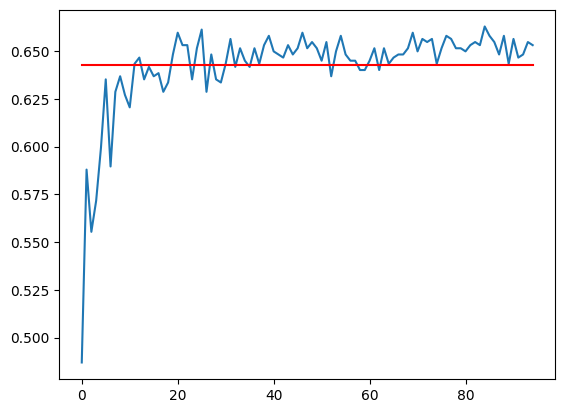

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],c='r')
plt.plot()